### **Number of Registered/Certified Businesses**

This dataset contains information on certified businesses, including details on their industry categories, types of certifications, employee 
sizes, small business statuses, and geographical locations. The certifications tracked include minority-owned (MBE), women-owned (WBE), 
veteran-owned, and SDO-certified businesses, reflecting the diversity and specialized certifications of businesses within various industries. 
Additionally, the dataset captures information on small local business certifications and categorizes businesses by industry and service type.

The goal of this analysis is to provide actionable insights into the landscape of certified businesses, offering a foundation for understanding 
diversity, local business representation, and certification trends across different industries. The dataset can be accessed here: https://data.boston.gov/dataset/certified-business-directory


#### **1. Loading necessary libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **2. Performing Exploratory Data Analysis**

In [2]:
df = pd.read_csv("certified_businesses.csv")
df.head()

,company_name,services_provided,mbe_wbe_cert,small_local_cert,veteran_cert,sdo_certified,city_registered,address,city,state,...,number_employees,cob_category_codes1,cob_category_codes2,cob_category_codes3,naics_codes1,naics_codes2,naics_codes3,unspsc_code1,unspsc_code2,unspsc_code3
0,"9THAI EXPRESS , LLC",FULL SERVICES OF RESTAURANT,MBE,NaN,NaN,No,No,"433 Cambridge Street, FIRST FLOOR., Boston, MA...",Boston,MA,...,Less than 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turning On the Lights Global Institute,Digital Coaching Service for Small Business Ow...,MWBE,NaN,NaN,No,No,"6 LIBERTY SQ, Suite 3013, Boston, MA 02109",Boston,MA,...,Less than 10,TA - Training (see also ED),BU - Business Management Consultants,MK - Marketing,611430 - Professional and Management Developme...,541613 - Marketing Consulting Services,NaN,86130000 - Specialized educational services,86120000 - Educational institutions,NaN
2,American Dream Home Care Agency LLC,"Personal care attended , educations",WBE,NaN,NaN,No,No,"33 Dover Street, Brockton, MA 2301",Brockton,MA,...,11 - 20,"AHS - Health Care (Providers, Services)",NaN,NaN,621610 - Home Health Care Services,NaN,NaN,85100000 - Comprehensive health services,NaN,NaN
3,Enlightened Inc,An Information Technology Consulting Firm Spec...,MBE,NaN,NaN,No,Yes,"1205 Marion Barry Avenue SE, Suite 300, Washin...",Washington,DC,...,Greater than 100,COM - Consultants: Management,COS - Consultants: Systems Analysis,NaN,541511 - Custom Computer Programming Services,541512 - Computer Systems Design Services,541519 - Other Computer Related Services,81110000 - Computer services,43230000 - Software,81160000 - Information Technology Service Deli...
4,The Little Cocoa Bean Co.,Baby and Toddler Food; Baby and Toddler Access...,MWBE,SLBE,NaN,No,No,"112 South Street, Boston, MA 02111",Boston,MA,...,Less than 10,"FD - Food Products, Services",AL - Apparel,NaN,"424330 - Women's, Children's, and Infants' Clo...",424490 - Other Grocery and Related Products Me...,NaN,50190000 - Prepared and preserved foods,53100000 - Clothing,NaN


In [3]:
zip_codes = ['02122', '02124', '02125', '02115', '02215', '02119', '02120', '02121', '02118'] #district 7 zipcodes

# Filter the dataset for rows where the 'zipcode' column matches one of the specified zip codes
df_district7 = df[df['zipcode'].astype(str).isin(zip_codes)]

# Display a sample of the filtered dataset
df_district7.head()

,company_name,services_provided,mbe_wbe_cert,small_local_cert,veteran_cert,sdo_certified,city_registered,address,city,state,...,number_employees,cob_category_codes1,cob_category_codes2,cob_category_codes3,naics_codes1,naics_codes2,naics_codes3,unspsc_code1,unspsc_code2,unspsc_code3
30,Audio and Lighting Unlimited,Audio and lighting equipment rental,MBE,NaN,NaN,No,Yes,"169 Norfolk Avenue, Boston, MA 02119",Boston,MA,...,Less than 10,AD - Advertising/Audovisual Graphic Design/Mar...,BU - Business Management Consultants,COT - Consultants: Telecommunications,532490 - Other Commercial and Industrial Machi...,NaN,NaN,45110000 - Audio and visual presentation and c...,83110000 - Telecommunications media services,43200000 - Components for information technolo...
38,"Black Owned Bos, LLC","Retail, Marketing, and Consulting",MWBE,SLBE,NaN,No,Yes,"623 Tremont Street, Boston, MA 02118",Boston,MA,...,Less than 10,COM - Consultants: Management,AD - Advertising/Audovisual Graphic Design/Mar...,RT - Retail Sales of Art & Framing,541613 - Marketing Consulting Services,"453220 - Gift, Novelty, and Souvenir Stores",NaN,80140000 - Marketing and distribution,NaN,NaN
39,"Bloom Architecture, Inc.",Architectural and Interior Design Services,NaN,SLBE,NaN,No,Yes,"784a Tremont Street, Boston, MA 02118",Boston,MA,...,Less than 10,AE - Architects/Engineers,IT - Interior Deisgn Services,NaN,541310 - Architectural Services,541410 - Interior Design Services,NaN,82150000 - Professional artists and performers,81100000 - Professional engineering services,NaN
45,"Bountyful Provisions Company, LLC","Wholesale food distributor, milk, eggs, cheese...",MBE,SLBE,NaN,Yes,Yes,"95 Ruthven Street, 1st Floor, Boston, MA 02121",Boston,MA,...,Less than 10,"FD - Food Products, Services","FD - Food Products, Services",SU - Suppliers,424410 - General Line Grocery Merchant Wholesa...,424470 - Meat and Meat Product Merchant Wholes...,112310 - Chicken Egg Production,73130000 - Food and beverage industries,NaN,NaN
46,Breezie Cleaning and Janitorial Services,Janitorial Cleaning; Window Cleaning; Carpet C...,MWBE,SLBE,NaN,Yes,Yes,"27 Beech Glen Street, Boston, MA 02119",Boston,MA,...,Less than 10,JA - Janitorial Services/Supplies (see also MA...,NaN,NaN,561720 - Janitorial Services,NaN,NaN,76110000 - Cleaning and janitorial services,NaN,NaN


In [4]:
df_district7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 30 to 929
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   company_name               189 non-null    object
 1   services_provided          189 non-null    object
 2   mbe_wbe_cert               177 non-null    object
 3   small_local_cert           124 non-null    object
 4   veteran_cert               1 non-null      object
 5   sdo_certified              189 non-null    object
 6   city_registered            189 non-null    object
 7   address                    189 non-null    object
 8   city                       189 non-null    object
 9   state                      189 non-null    object
 10  zipcode                    189 non-null    object
 11  contact_name               189 non-null    object
 12  contact_title              171 non-null    object
 13  phone                      189 non-null    object
 14  fax           

In [5]:
df_district7['number_employees'].value_counts()

number_employees
Less than 10    157
11 - 20          17
21 - 40           9
41 - 100          1
Name: count, dtype: int64

In [6]:
df_district7_new = df_district7[df_district7['number_employees'] != '20-Nov']
df_clean = df_district7_new['number_employees'].value_counts()
df_clean

number_employees
Less than 10    157
11 - 20          17
21 - 40           9
41 - 100          1
Name: count, dtype: int64

#### **3. Visualizing key metrics and relationships**

##### **3.1 SDO Certification Distribution**

This analysis presents the distribution of Supplier Diversity Office (SDO) Certification among businesses in District 7. The SDO certification aims to support diverse businesses by recognizing those that meet specific diversity and inclusion standards. This visualization allows stakeholders to see the proportion of SDO-certified businesses within the district. The pie chart breaks down the count of businesses that are SDO-certified versus those that are not.

Text(0.5, 1.0, 'SDO Certification Distribution')

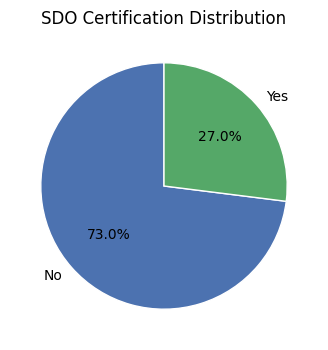

In [30]:
sdo_certified_dist = df_district7_new['sdo_certified'].value_counts().reset_index()
sdo_certified_dist.columns = ['SDO Certified', 'Count']

plt.figure(figsize=(6, 4))
plt.pie(
    sdo_certified_dist['Count'],
    labels=sdo_certified_dist['SDO Certified'],
    autopct='%1.1f%%',  
    startangle=90, 
    colors=['#4c72b0', '#55a868'], 
    wedgeprops={'edgecolor': 'white'}
)
plt.title('SDO Certification Distribution')

##### Insights:

- This chart reveals the prevalence of SDO-certified businesses in District 7, providing insight into the overall landscape of supplier diversity in the region.

- Understanding the proportion of SDO-certified businesses can inform support strategies for non-certified businesses that may benefit from assistance in meeting SDO standards.


##### **3.2 City Registration Distribution**

This analysis shows the City Registration Status of businesses in District 7. City registration indicates that a business is formally registered with the local government, which may be required for certain licenses, permits, or other regulatory purposes. This chart helps us understand the proportion of businesses that are officially registered with the city, giving insight into the local business compliance landscape. The pie chart categorizes businesses based on their city registration status, dividing them into registered and non-registered entities.

Text(0.5, 1.0, 'City Registration Distribution')

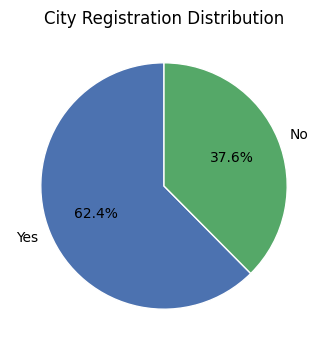

In [31]:
city_registered_dist = df_district7_new['city_registered'].value_counts().reset_index()
city_registered_dist.columns = ['City Registered', 'Count']

plt.figure(figsize=(6, 4))  
plt.pie(
    city_registered_dist['Count'],
    labels=city_registered_dist['City Registered'],
    autopct='%1.1f%%',  
    startangle=90, 
    colors=['#4c72b0', '#55a868'],  
    wedgeprops={'edgecolor': 'white'}
)
plt.title('City Registration Distribution')

##### Insights:

- This chart helps identify the proportion of businesses that comply with city registration requirements, providing a measure of formal business engagement with local governance.

- Understanding the registration distribution can assist in developing outreach initiatives to support non-registered businesses, potentially guiding them towards formal registration.



##### **3.3 Company Size Distribution by Number of Employees**

This analysis explores the Company Size Distribution of businesses in District 7, using the number of employees as an indicator of company size. This bar chart categorizes businesses based on their employee count, allowing stakeholders to understand the scale of businesses operating within the district. The bar chart segments businesses by their reported number of employees, ranging from small to large entities.

Text(0, 0.5, 'Number of Businesses')

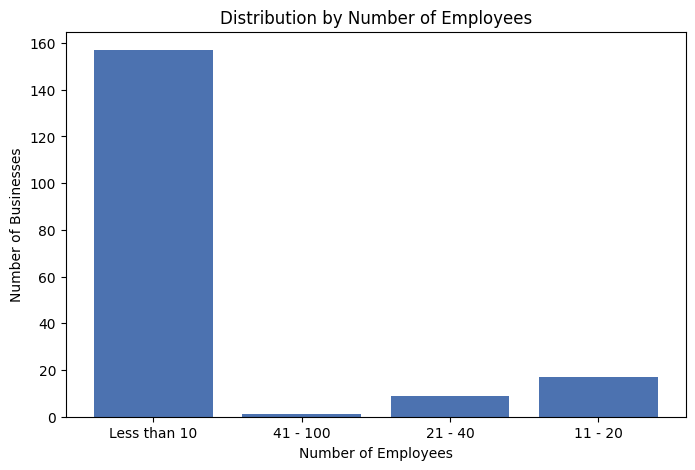

In [32]:
employees_dist = df_district7_new['number_employees'].value_counts().reset_index()
employees_dist.columns = ['Number of Employees', 'Count']

employees_dist = employees_dist.sort_values(by='Number of Employees', ascending=False)

plt.figure(figsize=(8, 5))  
plt.bar(employees_dist['Number of Employees'], employees_dist['Count'], color='#4c72b0')

plt.title('Distribution by Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Businesses')

##### Insights:

- This chart reveals whether District 7 is predominantly composed of small businesses or if there are significant numbers of medium and large businesses, offering insights into the district’s economic structure.

- Understanding the distribution of business sizes can help allocate resources and support tailored to different company sizes, ensuring that small, medium, and large businesses all receive appropriate assistance.

- This view of company size also provides insight into the workforce dynamics within District 7, offering an approximation of employment opportunities based on the prevalence of businesses by employee count.


##### **3.4 Certification Breakdown**

This analysis presents the Certification Breakdown of businesses in District 7, focusing on certifications such as MBE (Minority Business Enterprise), WBE (Women Business Enterprise), MWBE (Minority and Women Business Enterprise), and others. This pie chart visually represents the distribution of these certification types, highlighting the diversity within the district’s business community. The pie chart categorizes businesses based on their certification type, showcasing the proportion of each type within District 7.

Text(0.5, 1.0, 'Certification Breakdown')

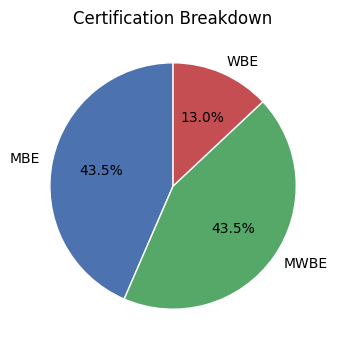

In [33]:
certification_breakdown = df_district7_new['mbe_wbe_cert'].value_counts().reset_index()
certification_breakdown.columns = ['Certification Type', 'Count']

plt.figure(figsize=(6, 4)) 
plt.pie(
    certification_breakdown['Count'],
    labels=certification_breakdown['Certification Type'],
    autopct='%1.1f%%',  
    startangle=90,  
    colors=['#4c72b0', '#55a868', '#c44e52', '#8172b2'], 
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Certification Breakdown')


##### Insights:

- This chart reveals the prevalence of different certification types, helping stakeholders assess the diversity of business ownership in District 7. A higher proportion of certain certifications (e.g., MWBE) may indicate a strong presence of diverse and inclusive businesses.

- Tracking certification distribution over time can help evaluate the success of diversity and inclusion initiatives, providing a basis for future policy and support programs.

##### **3.5 Small Local Business Certification Distribution**

This analysis illustrates the Distribution of Small Local Business Certifications among businesses in District 7. Small local business certifications indicate that a business meets certain criteria as a small, locally owned enterprise, often eligible for local support programs. This pie chart shows the proportion of businesses that have obtained this certification, offering insights into the presence of small, locally focused businesses within the district.

Text(0.5, 1.0, 'Small Local Business Certification Distribution')

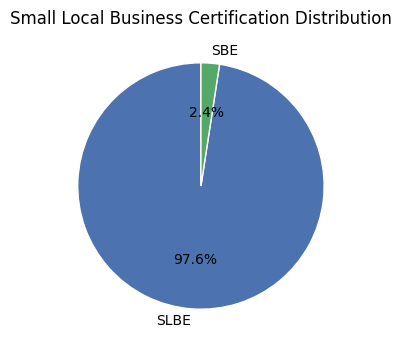

In [16]:
small_local_cert_dist = df_district7_new['small_local_cert'].value_counts().reset_index()
small_local_cert_dist.columns = ['Small Local Certification', 'Count']

plt.figure(figsize=(6, 4)) 
plt.pie(
    small_local_cert_dist['Count'],
    labels=small_local_cert_dist['Small Local Certification'],
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#4c72b0', '#55a868'], 
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Small Local Business Certification Distribution')


##### Insights:

- This chart reveals the extent to which small local businesses are present in District 7, highlighting the role of locally owned enterprises in the district’s economy.

- Knowing the proportion of small local businesses can help guide support initiatives, encouraging more small businesses to gain certification or supporting certified businesses in their growth.


##### **3.6 Employee Size vs. Certification Type**

This analysis examines the relationship between Employee Size and Certification Type for businesses in District 7. By categorizing businesses based on the number of employees and their certification type (e.g., MBE, WBE, MWBE), this bar chart provides insights into the diversity landscape across different company sizes.

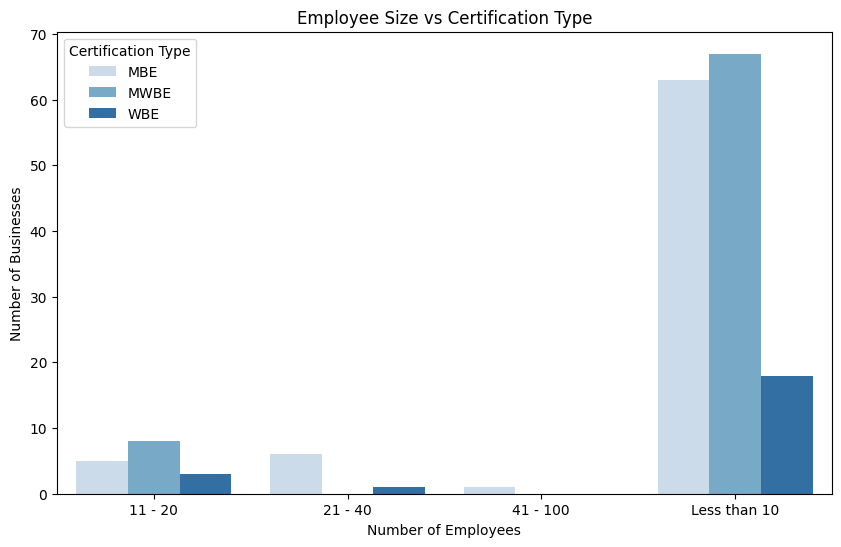

In [37]:
employee_vs_certification = df_district7_new.groupby(['number_employees', 'mbe_wbe_cert']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=employee_vs_certification,
    x='number_employees',
    y='Count',
    hue='mbe_wbe_cert',
    palette='Blues'  
)
plt.title('Employee Size vs Certification Type')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Businesses')
plt.legend(title='Certification Type')


##### Insights:

- This chart highlights the presence of different certification types within small, medium, and large businesses. Patterns may reveal if minority-owned or women-owned certifications are more prevalent in certain business sizes.

- Understanding the breakdown of certification types by company size can help tailor support programs. For example, if most certified businesses are small, resources could be directed toward helping these companies grow.

##### **3.7 Employee Size vs. Small Business Certification**

This analysis explores the relationship between Employee Size and Small Business Certification status for businesses in District 7. By categorizing businesses based on the number of employees and their small business certification status, this bar chart offers insights into the scale and reach of certified small businesses within the district.

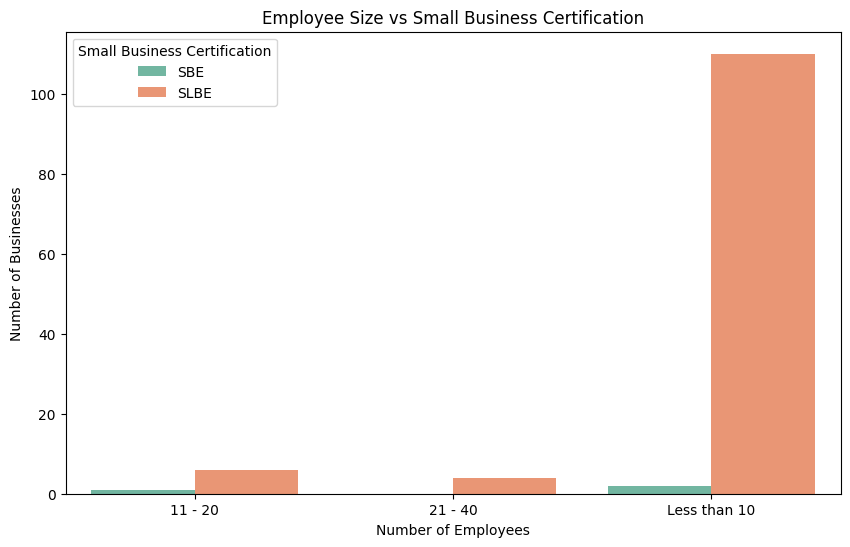

In [38]:
employee_vs_small_certification = df_district7_new.groupby(['number_employees', 'small_local_cert']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=employee_vs_small_certification,
    x='number_employees',
    y='Count',
    hue='small_local_cert',
    palette='Set2' 
)
plt.title('Employee Size vs Small Business Certification')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Businesses')
plt.legend(title='Small Business Certification')


##### Insights:

- This chart highlights the concentration of small business certifications across different employee sizes, showing if most certified small businesses are smaller (e.g., less than 10 employees) or if some certifications extend to larger companies.

- Understanding which sizes of businesses are more likely to be certified as small local businesses can help in designing support programs tailored to their needs. For instance, if most small certified businesses are very small, they might benefit from growth assistance.

##### **3.8 Employee Size Trends Over Time**

This analysis examines Employee Size Trends Over Time for businesses in District 7. By tracking changes in the number of businesses within each employee size category across different years, this line chart provides insight into the district’s business growth dynamics and the evolution of company sizes over time.

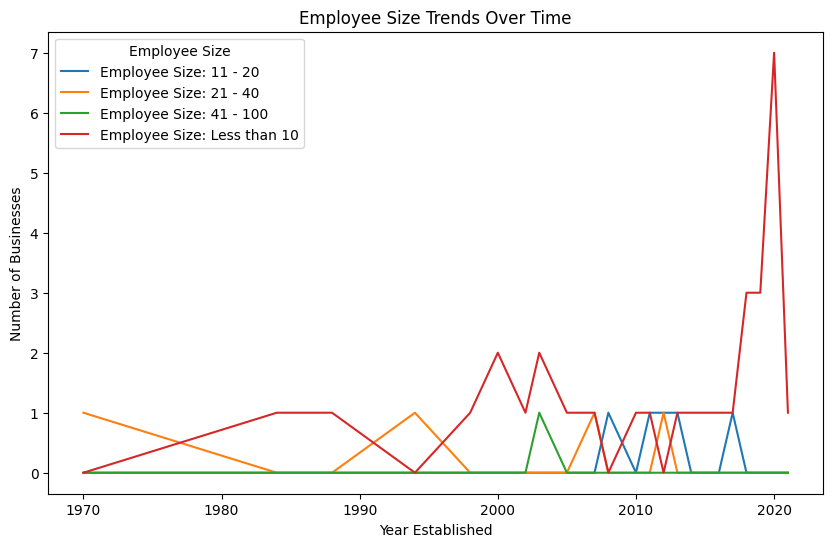

In [39]:
df_district7_new['year_established'] = pd.to_datetime(df_district7_new['date_business_established'], errors='coerce').dt.year
employee_size_trends = df_district7_new.groupby(['year_established', 'number_employees']).size().reset_index(name='Count')
employee_size_trends_pivot = employee_size_trends.pivot(index='year_established', columns='number_employees', values='Count').fillna(0)

plt.figure(figsize=(10, 6))

for column in employee_size_trends_pivot.columns:
    plt.plot(employee_size_trends_pivot.index, employee_size_trends_pivot[column], label=f'Employee Size: {column}')

plt.title('Employee Size Trends Over Time')
plt.xlabel('Year Established')
plt.ylabel('Number of Businesses')
plt.legend(title='Employee Size')

##### Insights:

-  This chart reveals trends in business sizes over time, showing if smaller or larger businesses have become more prevalent in recent years. It helps to identify periods of growth for specific company sizes, such as increased establishment of small businesses in certain years.

- The chart can reveal the impact of economic events on business formation and size over time. For instance, noticeable dips or rises in certain years may correlate with broader economic trends or local development initiatives.

##### **3.9 Longevity of Certified Businesses**

This analysis explores the Longevity of Certified Businesses in District 7, measured by the age of each business since its establishment. By categorizing businesses based on their certification type and age in years, this bar chart offers insights into the stability and longevity of certified businesses within the district.

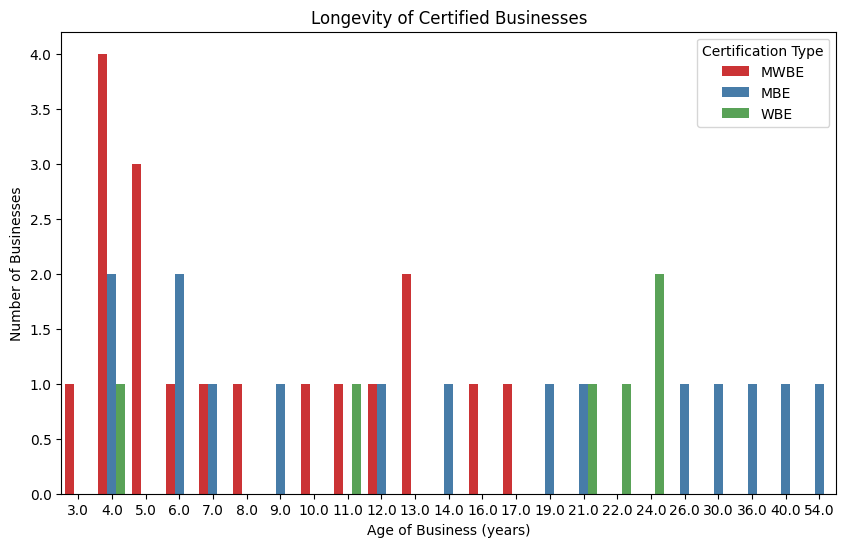

In [40]:
df_district7_new['business_age'] = 2024 - df_district7_new['year_established']  
longevity_certification = df_district7_new.groupby(['business_age', 'mbe_wbe_cert']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=longevity_certification,
    x='business_age',
    y='Count',
    hue='mbe_wbe_cert',
    palette='Set1' 
)
plt.title('Longevity of Certified Businesses')
plt.xlabel('Age of Business (years)')
plt.ylabel('Number of Businesses')
plt.legend(title='Certification Type')

##### Insights:

- This chart reveals patterns in business age across different certification types, helping to identify which certifications are associated with longer-standing businesses. For example, a higher concentration of older businesses with a particular certification may indicate stability in that category.

- By examining the distribution of business ages, we gain insight into the resilience of certified businesses within the district, as older businesses may indicate stability and adaptation over time.

##### **3.10 Certification Trends Over Time**

This analysis examines Certification Trends Over Time for businesses in District 7. By tracking the number of certified businesses established each year, categorized by certification type, this line chart provides insights into the growth and evolution of diversity certifications within the district.

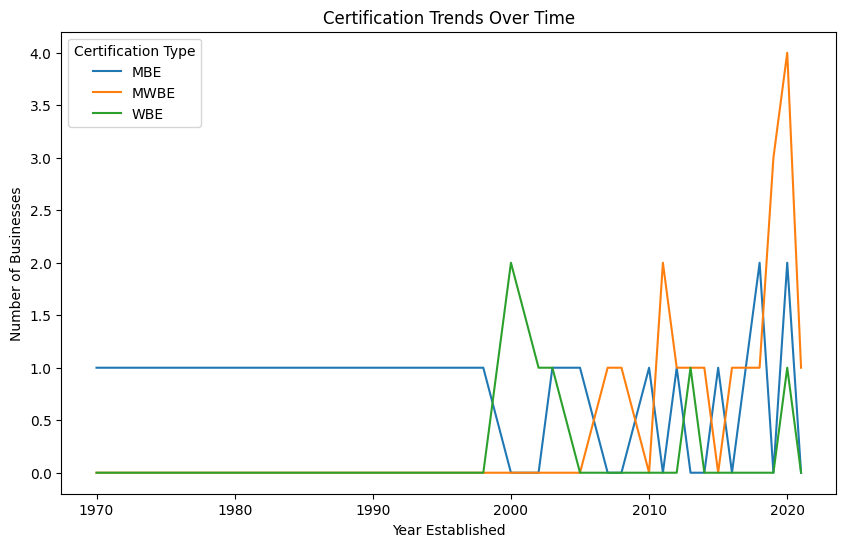

In [41]:
certification_trends = df_district7_new.groupby(['year_established', 'mbe_wbe_cert']).size().reset_index(name='Count')

certification_trends_pivot = certification_trends.pivot(index='year_established', columns='mbe_wbe_cert', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
for column in certification_trends_pivot.columns:
    plt.plot(certification_trends_pivot.index, certification_trends_pivot[column], label=column)

plt.title('Certification Trends Over Time')
plt.xlabel('Year Established')
plt.ylabel('Number of Businesses')
plt.legend(title='Certification Type')


##### Insights:

- This chart reveals how the number of certified businesses has evolved, highlighting any increases or declines in certain certifications over time. For example, a rise in MWBE certifications in recent years may indicate growing support for both minority- and women-owned businesses.

- Understanding certification trends over time can help assess the impact of diversity and inclusion initiatives. Increased certifications in certain periods may correlate with local or national policies supporting diverse businesses.


#### **Conclusion:**

This analysis provides an in-depth look into the registered/certified business landscape of District 7, with a focus on diversity, small business representation, and business growth over time. By examining a variety of factors—such as certification types, business size, longevity, and registration status—this analysis offers valuable insights into the economic makeup of District 7 and highlights areas for potential development and support.

This analysis underscores the importance of diversity, small business support, and targeted resources for local economic development. Stakeholders can use these insights to:
- Develop **support programs** tailored to the specific needs of certified small businesses and those in high-growth areas.

- **Promote diversity and inclusion** by supporting businesses that contribute to a more inclusive economic landscape.

- **Encourage formal registration** among businesses, helping them access resources and comply with city regulations.

- Monitor **long-term stability** and growth patterns, ensuring that both newer and established businesses receive appropriate support.